In [1]:
# importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ANZ.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# Checking the shape of the dataframe
df.shape

(12043, 23)

In [4]:
# Getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
# Checking how many missing values are there
df.isna().sum()


status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

Merchant Code and Bpay biller code columns has almost 90% missing values either dropping the columns or ignoring is the best to do. 

In [6]:
# Converting the date column to pandas Timestap since this is an Time Series data 
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Checking 
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df['date'].head(7)

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
5   2018-08-01
6   2018-08-01
Name: date, dtype: datetime64[ns]

Now the object are turned to pandas Timestamp object.

In [9]:
# By using the date we acquired converting them to days of that particular date
df['day_name'] = df['date'].dt.day_name()
df['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

Successfully converted those dates to respective day.

In [10]:
# Creating Month by using the date gives so can be useful for EDA 
df['month_name'] = df['date'].dt.month_name()
df['month_name'].head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [11]:
# Checking out available months generated from the date give
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

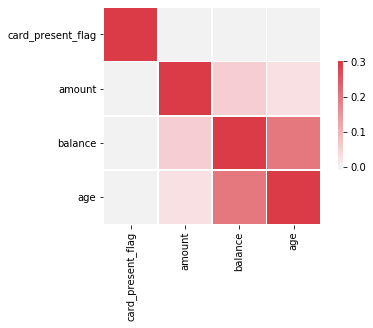

In [12]:
# Plotting the correlation heatmap 
cor_mat = df[['card_present_flag' , 'amount' , 'balance' ,'date' , 'status', 
             'bpay_biller_code' , 'account' , 'txn_description',
             'gender' , 'age' , 'extraction']].corr()
# Custom cmap pallete
cmap = sns.diverging_palette(220 , 10 , as_cmap=True)

# Building heatmap
sns.heatmap(cor_mat ,vmax=.3 , center=0 , cmap=cmap , square=True , linewidths=.5 , cbar_kws={'shrink': .5})

In [13]:
# Correlation matrix in Tabular form
cor_mat

,card_present_flag,amount,balance,age
card_present_flag,1.000000,-0.002074,0.005925,-0.008405
amount,-0.002074,1.000000,0.059178,0.029980
balance,0.005925,0.059178,1.000000,0.199329
age,-0.008405,0.029980,0.199329,1.000000


Things we can infer from the heatmap : 


**Considerable Correlation**
* The amount and balance have a pretty good correlation together
* The amount and age have a decent correlation which we can consider.
* The balance and age have a strong correlation.

**Non-Considerable Correlation**
* The age and card_present_flag has negative correlation.
* The amount and car-present_flag has negative correlation.


### Filtering things out of Months and analyzing

In [14]:
# Checking amount transacted in October month
filt = (df['month_name'] == 'October')
df.loc[filt , 'amount']

7956      29.57
7957       8.44
7958     163.00
7959      10.65
7960      33.00
          ...  
12038      9.79
12039     63.87
12040     43.96
12041     30.77
12042     22.36
Name: amount, Length: 4087, dtype: float64

In [15]:
# Average amount in october month
df.loc[filt , 'amount'].mean()

196.42732321996542

In [16]:
# Maximum Value transacted in October month 
df.loc[filt , 'amount'].max()

8835.98

In [17]:
# Minimum Value transacted in October month 
df.loc[filt , 'amount'].min()

0.1

In October Month : 
* The average amount transacted was `196.42732321996542`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `0.1`

In [18]:
# Checking amount transacted in September month
filt = (df['month_name'] == 'September')
df.loc[filt , 'amount']

3943     9.15
3944    85.84
3945    15.66
3946    14.87
3947    26.00
        ...  
7951    17.36
7952    21.62
7953     8.33
7954    20.12
7955    19.71
Name: amount, Length: 4013, dtype: float64

In [19]:
# Average amount in september month
df.loc[filt , 'amount'].mean()

182.04590331422853

In [20]:
# Maximum amount in september month
df.loc[filt , 'amount'].max()

8835.98

In [21]:
# Minimum Value transacted in september month 
df.loc[filt , 'amount'].min()

0.1

In September Month : 
* The average amount transacted was `182.04590331422853`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `0.1`

In [22]:
# Checking amount transacted in August month
filt = (df['month_name'] == 'August')
df.loc[filt , 'amount']

0       16.25
1       14.19
2        6.42
3       40.90
4        3.25
        ...  
3938    21.86
3939    43.57
3940    14.46
3941    11.06
3942     7.59
Name: amount, Length: 3943, dtype: float64

In [23]:
# Average amount in august month
df.loc[filt , 'amount'].mean()

185.12186659903654

In [24]:
# Maximum amount in september month
df.loc[filt , 'amount'].max()

8835.98

In [25]:
# Minimum amount in september month
df.loc[filt , 'amount'].min()

1.52

In September Month : 
* The average amount transacted was `185.12186659903654`
* The maximum amount transacted was `8835.98`
* The minimum amount transacted was `1.52`

M    6285
F    5758
Name: gender, dtype: int64


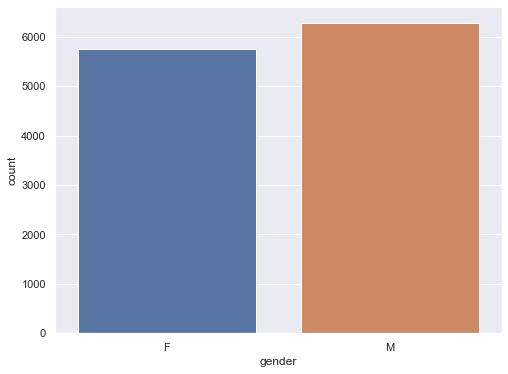

In [26]:
print(df['gender'].value_counts())
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.countplot(df['gender'])
plt.show()

* There are more Male customers than Female customers

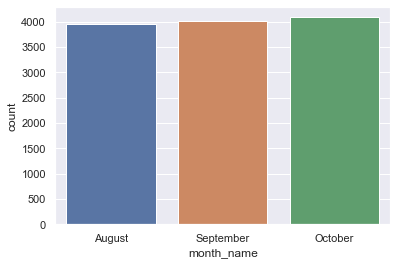

In [27]:
# Month where highest number of transaction took place
sns.countplot(x='month_name' , data=df)

* October is the month where 4087 transaction took place by all those customers which was highest comparing rest of the months.
* August has low transaction comparing other months of 3943.

Text(0.5, 1.0, 'Month where highest number of\ntransaction took place based on gender')

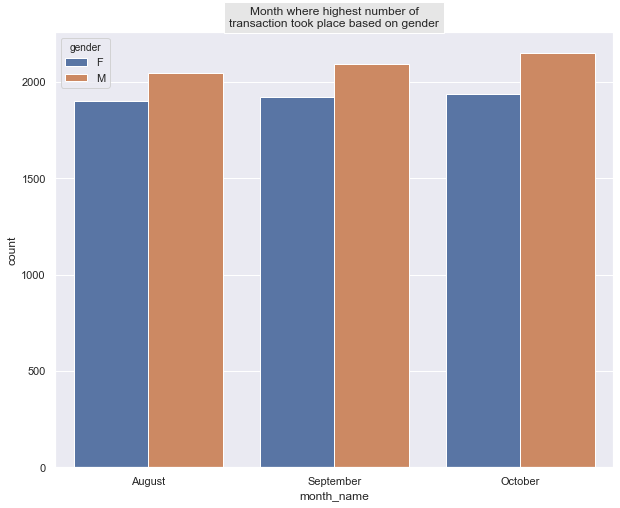

In [28]:
# Month where highest number of transaction took place based on gender
plt.figure(figsize=(10,8))
sns.countplot(x='month_name' ,hue='gender', data=df)
plt.title('Month where highest number of\n'+'transaction took place based on gender',bbox={'facecolor':'0.9', 'pad':5})

* We can clearly infer Male has made more transaction than Female on all three months

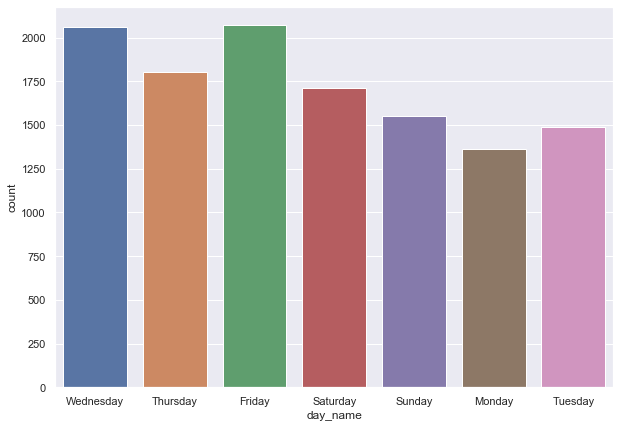

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='day_name' , data=df)

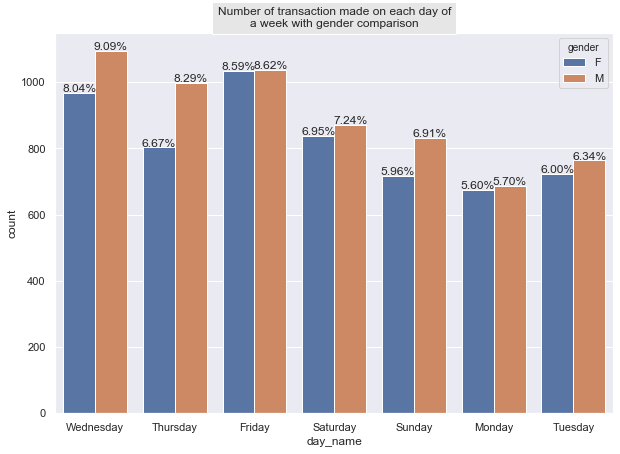

In [30]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x="day_name", hue="gender", data=df) # for Seaborn version 0.7 and more
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 

plt.title('Number of transaction made on each day of\n'+'a week with gender comparison',bbox={'facecolor':'0.9', 'pad':5})
plt.show()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64


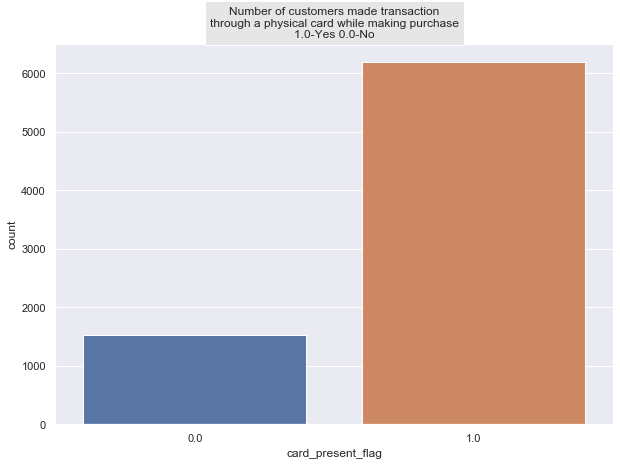

In [31]:
plt.figure(figsize=(10,7))
print(df['card_present_flag'].value_counts())
ax = sns.countplot(x='card_present_flag' , data=df)
total = float(len(df['card_present_flag']))
plt.title('Number of customers made transaction\n'+'through a physical card while making purchase\n'+'1.0-Yes 0.0-No',bbox={'facecolor':'0.9', 'pad':5} )
plt.show()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


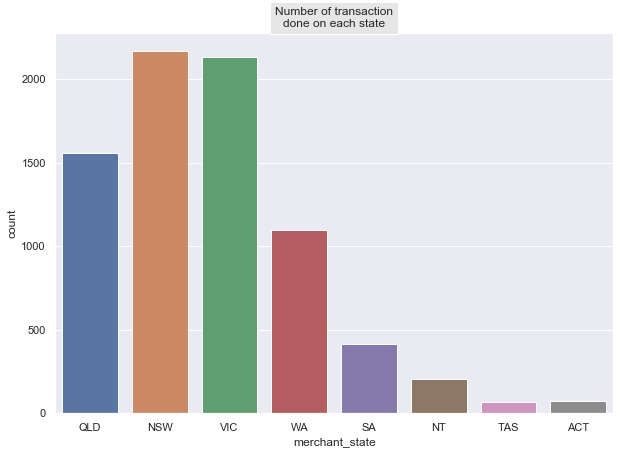

In [32]:
print(df['merchant_state'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['merchant_state'])
plt.title('Number of transaction\n' 'done on each state',bbox={'facecolor':'0.9', 'pad':5})
plt.show()


SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


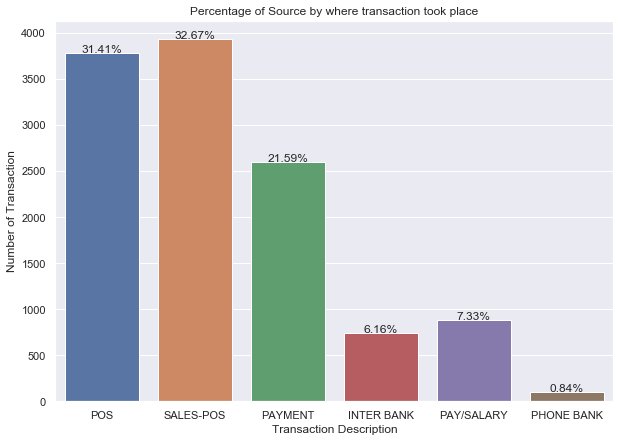

In [33]:
print(df['txn_description'].value_counts())
sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
ax = sns.countplot(df['txn_description'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of Source by where transaction took place')
plt.ylabel('Number of Transaction')
plt.xlabel('Transaction Description')
plt.show()


Text(0.5, 1.0, 'Distribution of customers based on age group')

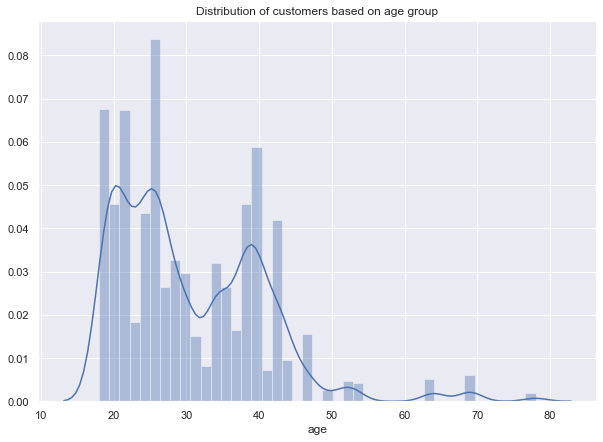

In [34]:
# Distribution of Age of the customers.
plt.figure(figsize=(10,7))
sns.distplot(df['age']);
plt.title('Distribution of customers based on age group' , )

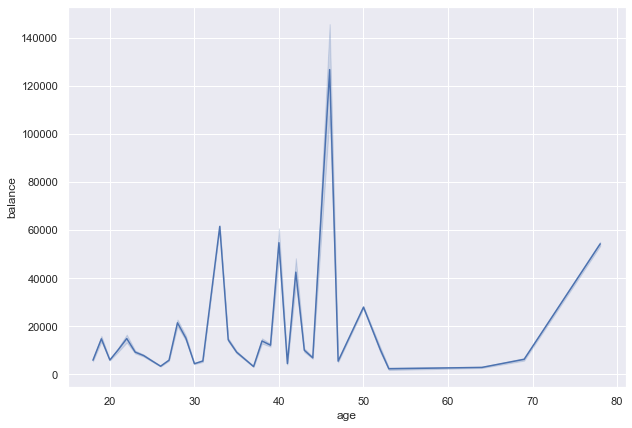

In [35]:
# Figuring out which age group has more balance.
plt.figure(figsize=(10,7))
sns.lineplot(x='age' , y='balance' , data=df)

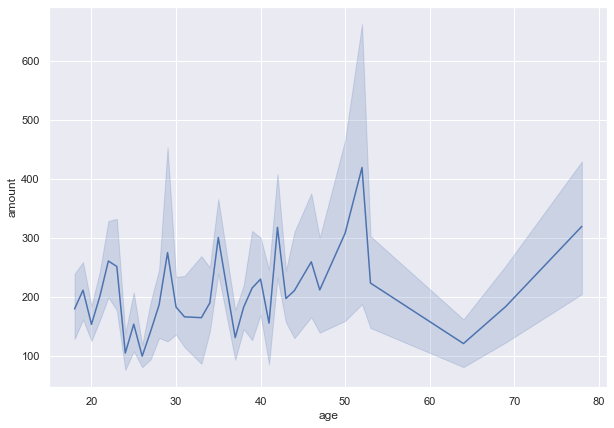

In [36]:
# Figuring out which age group has transacted more
plt.figure(figsize=(10,7))
sns.lineplot(x='age' , y='amount' , data=df)

In [37]:
# Checking the mean for numerical data in dataframe
df.mean()

card_present_flag        0.802644
merchant_code            0.000000
balance              14704.195553
age                     30.582330
amount                 187.933588
dtype: float64

**In the 3 months of transaction data:**
* The average age group of customers who made the transactions are 30 years of age.
* The average balance a customer have in their account is 14704.195 AUD.
* The average transaction made by the customer is 187.93 AUD.

In [38]:
# making a group with merchant_state dataframe
mer_state_grp = df.groupby(['merchant_state'])

merchant_state  gender
ACT             F         0.630137
                M         0.369863
NSW             M         0.548179
                F         0.451821
NT              F         0.975610
                M         0.024390
QLD             F         0.514139
                M         0.485861
SA              F         0.590361
                M         0.409639
TAS             M         0.764706
                F         0.235294
VIC             M         0.569216
                F         0.430784
WA              F         0.597273
                M         0.402727
Name: gender, dtype: float64


Text(0.5, 1.0, 'Number of Male and Female\nmade transaction in particular state')

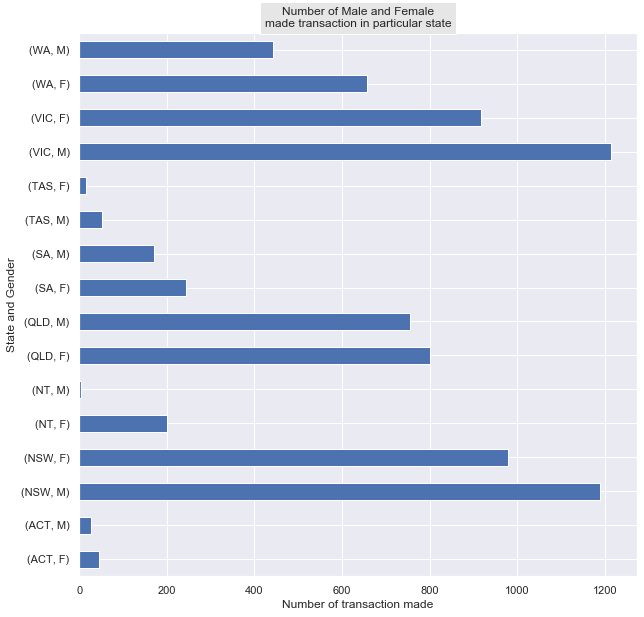

In [39]:
# Number of Male and Female made transaction in the particular merchant state's
print(mer_state_grp['gender'].value_counts(normalize=True))
gen_mer_state = mer_state_grp['gender'].value_counts()
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
gen_mer_state.plot.barh()
ax.set(xlabel="Number of transaction made",
      ylabel="State and Gender")
plt.title('Number of Male and Female\n'+'made transaction in particular state',bbox={'facecolor':'0.9', 'pad':5})




## Percentage of Male and Female made transaction in the particular merchant state
### Below are made taking account of Top 5 states in Australia by population
* **At Tasmania `76.4%` Male made transaction and `23.5%` Female made transaction which shows Male contributed alot to Tasmania.**

* **At Western Australia Female have made `59.8%` of transaction and Male made `40.2%` of transaction which shows Female contribution is more in WA.**

* **At Queensland Female have made `51.14%` of transaction and Male made `48.96%` of transaction which shows Female contribution is more in QLD.**

* **At South Australia Female have made `59.03%` of transaction and Male made `40.96%` of transaction which shows Female contribution is more in SA.**

* **At New South Wales Male have made `54.82%` of transaction and Male made `45.18%` of transaction which shows Female contribution is more in NSW.**

* **At Victoria Male have made `56.92%` of transaction and Male made `43.08%` of transaction which shows Female contribution is more in Victoria**


wa_avg_age = mer_state_grp['age'].value_counts().loc['WA'].mean()
vic_avg_age = mer_state_grp['age'].value_counts().loc['VIC'].mean()
qs_avg_age = mer_state_grp['age'].value_counts().loc['QLD'].mean()
sa_avg_age = mer_state_grp['age'].value_counts().loc['SA'].mean()
nsw_avg_age = mer_state_grp['age'].value_counts().loc['NSW'].mean()

debit     11160
credit      883
Name: movement, dtype: int64


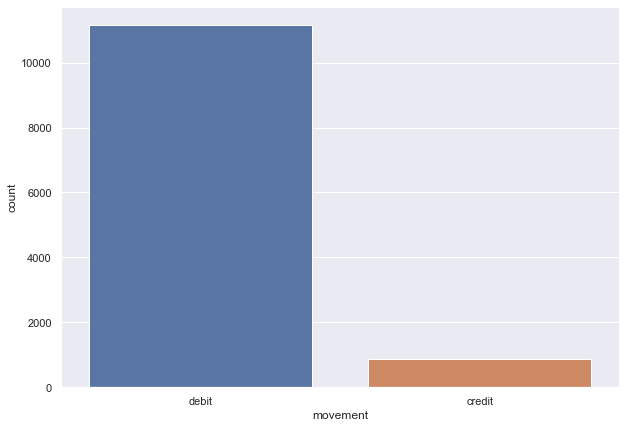

In [40]:
# Number of debit and credit transaction
plt.figure(figsize=(10,7))
print(df['movement'].value_counts())
sns.countplot(df['movement'])

**We can infer that there were large number of Debit transaction made than Credit transaction**
* Debit Transaction `11160`
* Credit Transaction `883`


Text(0.5, 1.0, 'Percentage of Male and Female who made\nDebit and Credit Transaction')

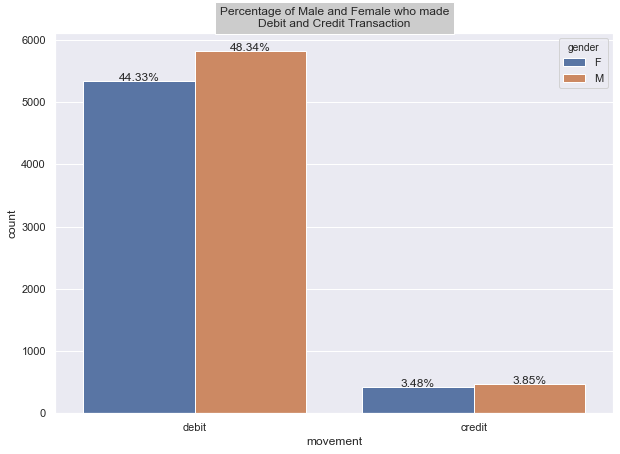

In [41]:
# Which gender made most debit and credit transaction 
plt.figure(figsize=(10,7))
ax = sns.countplot(df['movement'] , hue=df['gender'])
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
plt.title('Percentage of Male and Female who made\n'+'Debit and Credit Transaction',bbox={'facecolor':'0.8', 'pad':5})

### Percentage of Male and Female who made Debit and Credit Transaction :
* **Over `48.34%` Male and `44.33%` Female have made Debit Transaction.**
* **Over `3.85%` Male and `3.48%` Female have made Credit Transaction.**

**To sum up approx 92% people have done debited transaction and 8% done credited transaction**


Text(0.5, 1.0, 'Percentage of contribution\nof months')

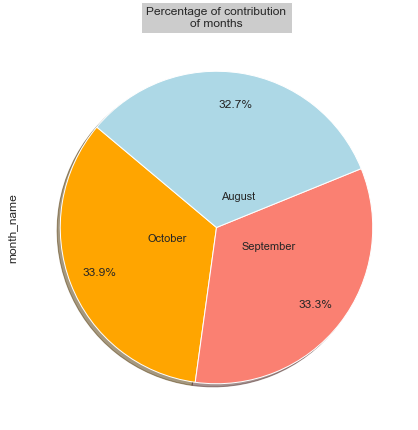

In [42]:
# Percentage of contribution of months
pie_color = ['orange' , 'salmon', 'lightblue']
fig,ax = plt.subplots(figsize=(7,8)) # (height,width)

df['month_name'].value_counts(sort=True).plot.pie(labeldistance=0.2 ,
                                         colors=pie_color,
                                        autopct='%1.1f%%', shadow=True, startangle=140,pctdistance=0.8 , radius=1)
plt.title("Percentage of contribution\n" + "of months", bbox={'facecolor':'0.8', 'pad':5})



Text(0.5, 1.0, 'Percentage of contribution\nof Male and Female')

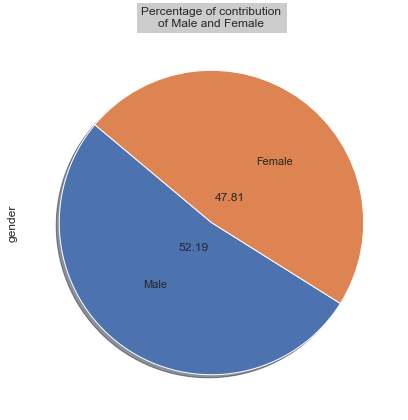

In [43]:
# Percentage of contribution of gender 
plt.figure(figsize=(10,7))
df['gender'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Male',
                                                                         'Female'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of contribution\n'+'of Male and Female' , bbox={'facecolor':'0.8', 'pad':5})


### Top 10 Customers who made transaction 

In [44]:
# Top 10 customers 
top_cust = df['first_name'].value_counts(sort=True).nlargest(10)
top_cust

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

**Michael has made more transaction of 746**

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Top 10 Customer')]

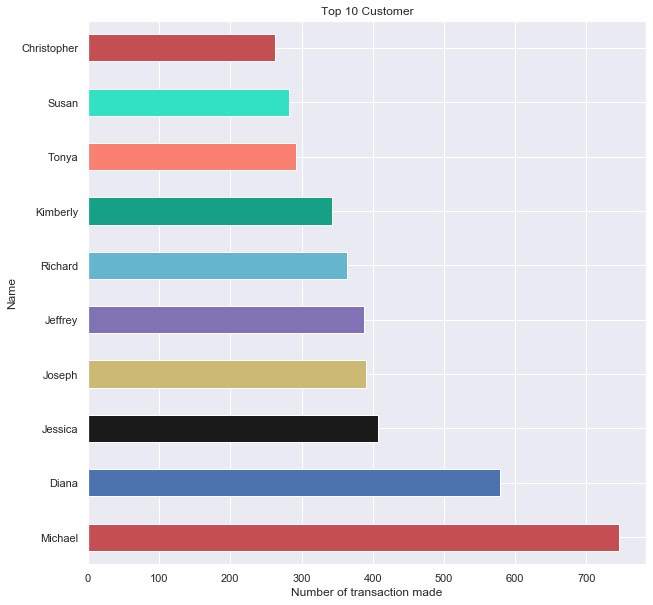

In [79]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
top_cust.plot.barh(color=my_colors)
ax.set(title="Top 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")


### Least 10 Customers who made transaction

In [46]:
tail_cust = df['first_name'].value_counts(sort=True).nsmallest(10)
tail_cust

#Colors for the bar of the graph
my_colors = ['r','b','k','y','m','c','#16A085','salmon' , '#32e0c4']

[Text(0, 0.5, 'Name'),
 Text(0.5, 0, 'Number of transaction made'),
 Text(0.5, 1.0, 'Least 10 Customer')]

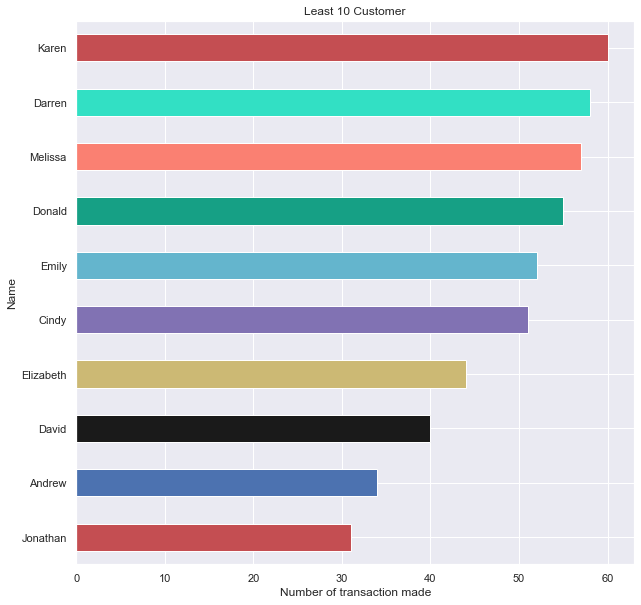

In [47]:
fig,ax = plt.subplots(figsize=(10,10)) # (height,width)
tail_cust.plot.barh(color=my_colors)
ax.set(title="Least 10 Customer",
      xlabel="Number of transaction made",
      ylabel="Name")


**Jonathan has made fewer transaction of 31**

In [48]:
gender_grp = df.groupby(['gender'])

In [49]:
# Average transaction amount made by Male and Female 
gen_trans_amt = gender_grp['amount'].mean()
gen_trans_amt

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64

[Text(0, 0.5, 'Gender'),
 Text(0.5, 0, 'Average amount'),
 Text(0.5, 1.0, 'Average amount transacted by Male and Female')]

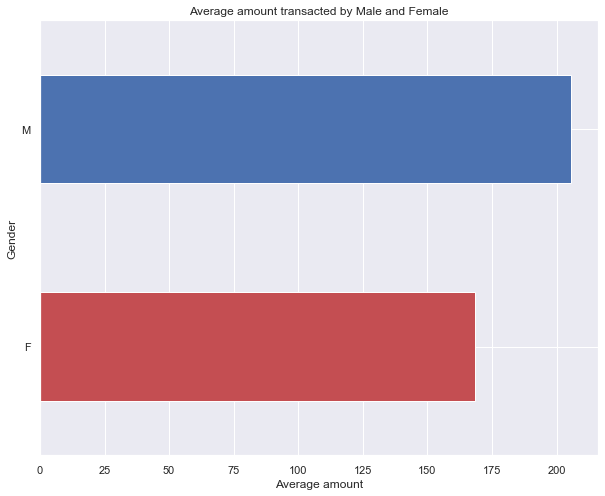

In [50]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
gen_trans_amt.plot.barh(color=my_colors)
ax.set(title="Average amount transacted by Male and Female",
      xlabel="Average amount",
      ylabel="Gender")


### Getting the Maximum , Minimum and Average amount transacted in each merchant state

In [51]:
agg_amt_state = mer_state_grp['amount'].agg(['min' , 'mean' , 'max'])

In [52]:
agg_amt_state.columns

Index(['min', 'mean', 'max'], dtype='object')

In [53]:
agg_amt_state

,min,mean,max
merchant_state,,,
ACT,4.50,66.803836,1348.47
NSW,0.10,47.036316,4233.00
NT,1.71,44.726293,1285.09
QLD,0.10,34.372397,7081.09
SA,3.28,40.425470,909.61
TAS,7.35,28.866618,133.31
VIC,0.10,41.099953,3680.71
WA,2.05,30.901873,1692.56


merchant_state
ACT    4.50
NSW    0.10
NT     1.71
QLD    0.10
SA     3.28
TAS    7.35
VIC    0.10
WA     2.05
Name: min, dtype: float64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Amount'),
 Text(0.5, 1.0, 'Minimum amount transacted in each state')]

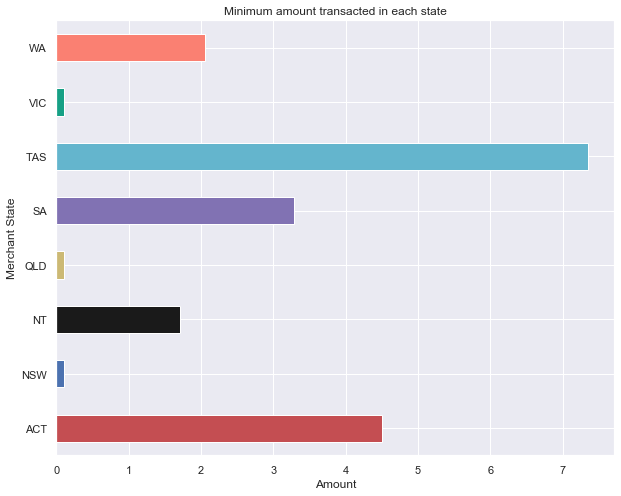

In [54]:
# Minimum ammount transacted in each state
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
print(agg_amt_state['min'])
agg_amt_state['min'].plot.barh(color=my_colors)
ax.set(title="Minimum amount transacted in each state",
      xlabel="Amount",
      ylabel="Merchant State")

merchant_state
ACT    1348.47
NSW    4233.00
NT     1285.09
QLD    7081.09
SA      909.61
TAS     133.31
VIC    3680.71
WA     1692.56
Name: max, dtype: float64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Amount'),
 Text(0.5, 1.0, 'Maximum amount transacted in each state')]

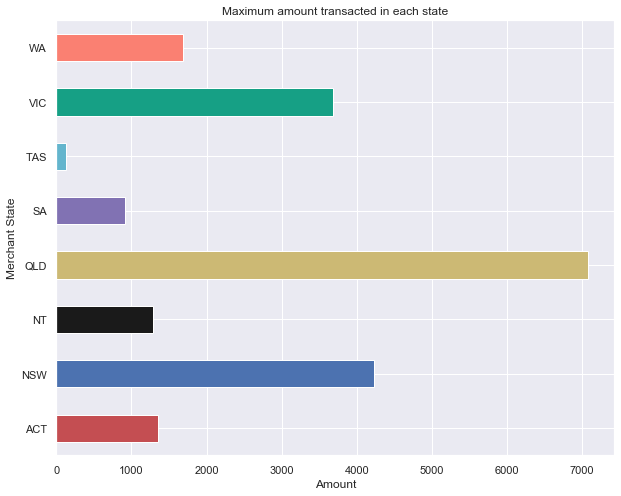

In [55]:
# Maximum amount transacted in each state
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
print(agg_amt_state['max'])
agg_amt_state['max'].plot.barh(color=my_colors)
ax.set(title="Maximum amount transacted in each state",
      xlabel="Amount",
      ylabel="Merchant State")

In [56]:
trans_desc_grp = df.groupby(['txn_description'])

In [57]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [58]:
trans_desc_grp['first_name'].value_counts().loc['SALES-POS'].nlargest(10)

first_name
Diana          272
Michael        262
Joseph         170
Jeffrey        166
Jessica        148
Kimberly       143
Tonya          123
Richard        112
Rhonda         109
Christopher     95
Name: first_name, dtype: int64

## Number of transaction made in each state by the Top 5 Customer's

In [59]:
# Printing out Top 5 Customer 
top_cust[:5]

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

In [60]:
michael_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Michael').sum())
diana_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Diana').sum())
jess_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Jessica').sum())
jose_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Joseph').sum())
jeff_tran_each_state = mer_state_grp['first_name'].apply(lambda x: x.str.contains('Jeffrey').sum())

### Number of transaction made by Michael in each state. 

merchant_state
ACT      1
NSW    273
NT       0
QLD     25
SA      18
TAS      2
VIC    141
WA      59
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Michael in each state')]

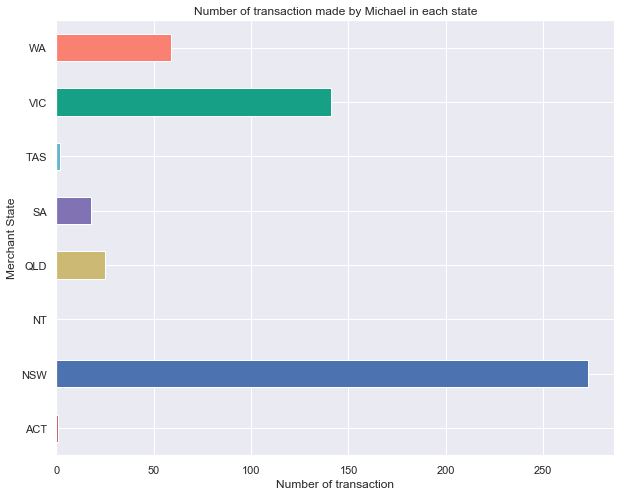

In [61]:
fig,ax = plt.subplots(figsize=(10,8))
print(michael_tran_each_state);
michael_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Michael in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Diana  in each state

merchant_state
ACT      0
NSW     63
NT       1
QLD    444
SA       1
TAS      0
VIC     17
WA       5
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Diana in each state')]

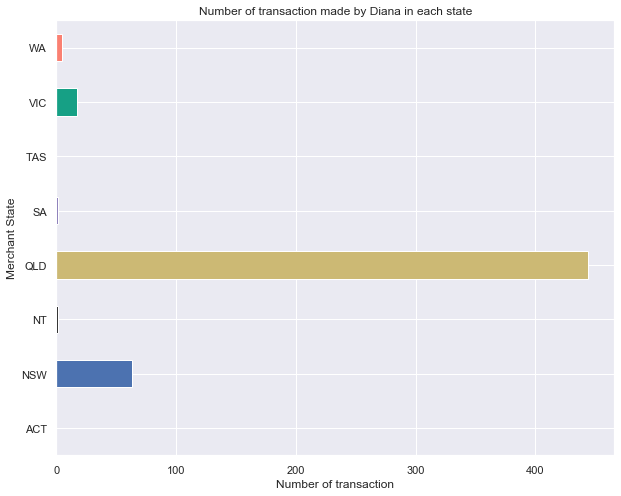

In [62]:
fig,ax = plt.subplots(figsize=(10,8))
print(diana_tran_each_state);
diana_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Diana in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Jessica in each state

merchant_state
ACT     23
NSW     45
NT     110
QLD      7
SA      59
TAS      0
VIC     11
WA      31
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Jessica in each state')]

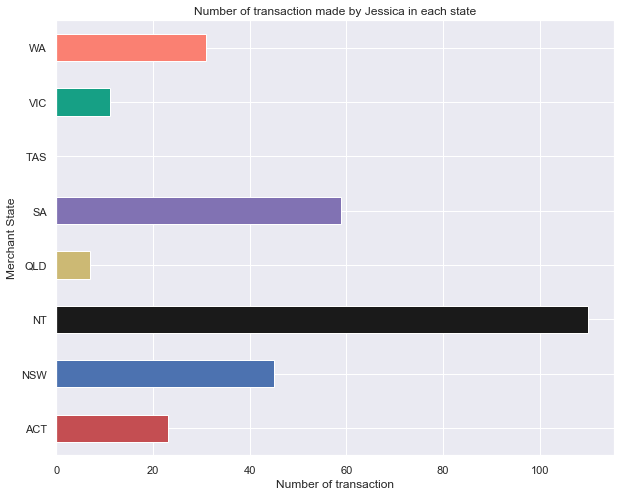

In [63]:
fig,ax = plt.subplots(figsize=(10,8))
print(jess_tran_each_state);
jess_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Jessica in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Joseph in each state 

merchant_state
ACT      0
NSW     26
NT       0
QLD    165
SA       1
TAS      5
VIC    104
WA       5
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Joseph in each state')]

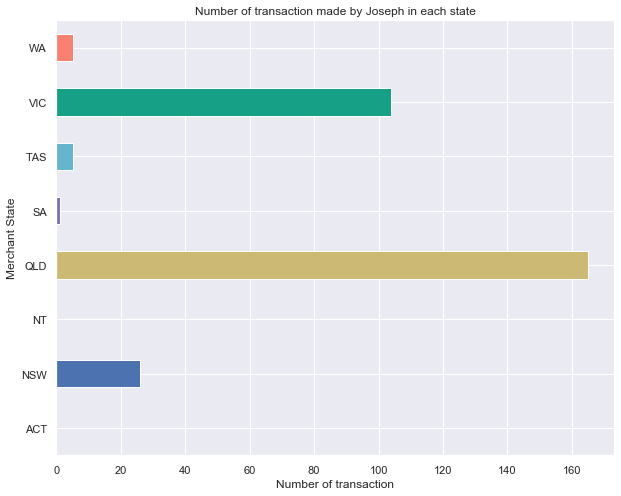

In [64]:
fig,ax = plt.subplots(figsize=(10,8))
print(jose_tran_each_state);
jose_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Joseph in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

### Number of transaction made by Jeffrey in each state 

merchant_state
ACT      1
NSW     26
NT       0
QLD    175
SA       7
TAS      0
VIC    103
WA       4
Name: first_name, dtype: int64


[Text(0, 0.5, 'Merchant State'),
 Text(0.5, 0, 'Number of transaction'),
 Text(0.5, 1.0, 'Number of transaction made by Jeffrey in each state')]

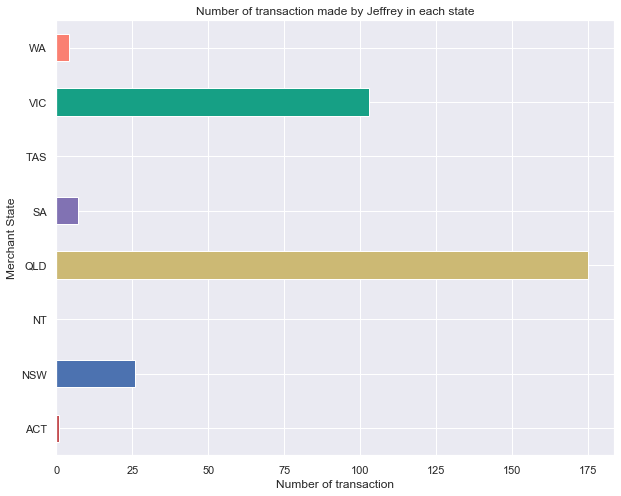

In [65]:
fig,ax = plt.subplots(figsize=(10,8))
print(jeff_tran_each_state);
jeff_tran_each_state.plot.barh(color=my_colors)
ax.set(
    title='Number of transaction made by Jeffrey in each state',
    xlabel='Number of transaction',
    ylabel='Merchant State'
)

##  How many transactions do customers make each month, on average?

In [66]:
month_grp = df.groupby(['month_name'])

In [67]:
avg_amt_tran_month = month_grp['amount'].mean()
oct_amt_tran_month = month_grp['amount'].value_counts().loc['October']

month_name
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


[Text(0, 0.5, 'Month Name '),
 Text(0.5, 0, 'Average amount'),
 Text(0.5, 1.0, 'Average transaction made my customer on average each month')]

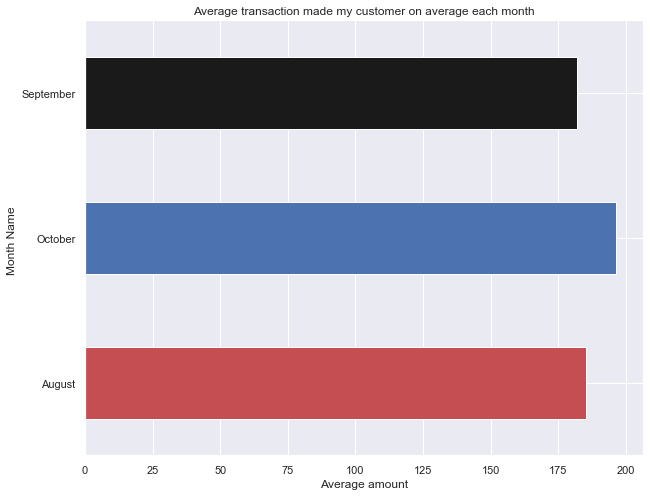

In [68]:
fig,ax = plt.subplots(figsize=(10,8)) # (height,width)
print(avg_amt_tran_month);
avg_amt_tran_month.plot.barh(color=my_colors)
ax.set(
    title='Average transaction made my customer on average each month',
    xlabel='Average amount',
    ylabel='Month Name '
)

In [69]:
oct_amt_tran_month = month_grp['amount'].value_counts().loc['October']
oct_amt_tran_month

amount
33.00      58
39.00      43
29.00      42
36.00      39
20.00      35
           ..
4094.33     1
4863.62     1
4910.90     1
6107.23     1
7081.09     1
Name: amount, Length: 2288, dtype: int64

In [70]:
oct_date = month_grp['date'].value_counts().loc['October']

## Average amount transacted on particualr Days

In [71]:
day_name_grp = df.groupby(['day_name'])

### On Monday 

In [72]:
day_name_grp['amount'].mean().loc['Monday']

373.22099999999995

### On Tuesday

In [73]:
day_name_grp['amount'].mean().loc['Tuesday']

221.5764559515801

### On Wednesday 

In [74]:
day_name_grp['amount'].mean().loc['Wednesday']

195.21556955889483

### On Thursday 

In [75]:
day_name_grp['amount'].mean().loc['Thursday']

184.01042198778472

### On Friday

In [76]:
day_name_grp['amount'].mean().loc['Friday']

249.35351664254722

### On Satuday 

In [77]:
day_name_grp['amount'].mean().loc['Saturday']

54.419286132241076

### On Sunday

In [78]:
day_name_grp['amount'].mean().loc['Sunday']

53.01584516129036